В работе рассматриваются способы детектирования границ объектов на изображении. Для детектирования было выбрано 4 изображения, задача которых в полной мере продемонстрировать работоспособность используемых методов. Изображения были приведены в серую цветовую гамму. 

In [2]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

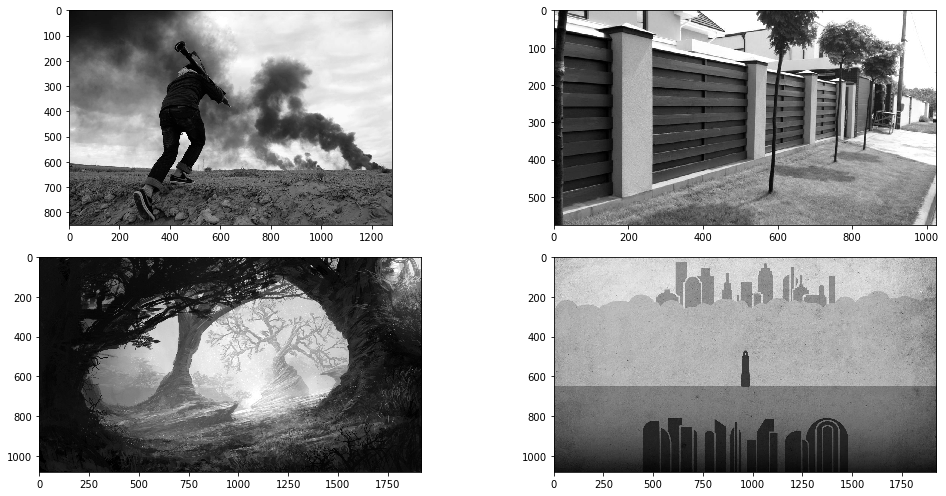

In [15]:
img1 = cv.cvtColor(cv.imread('res/1.jpg'), cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(cv.imread('res/2.jpg'), cv.COLOR_BGR2GRAY)
img3 = cv.cvtColor(cv.imread('res/3.jpg'), cv.COLOR_BGR2GRAY)
img4 = cv.cvtColor(cv.imread('res/4.jpg'), cv.COLOR_BGR2GRAY)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))
axes[0,0].imshow(img1, cmap='gray')
axes[0,1].imshow(img2, cmap='gray')
axes[1,0].imshow(img3, cmap='gray')
axes[1,1].imshow(img4, cmap='gray')
fig.tight_layout()

В качестве первого способа детектирования границ используется оператор Собеля. Для метода используются ядра(матрицы свёрки):
$$
G_x = 
\left(\begin{array}{ccc} 
1 & 0 & -1\\
2 & 0 & -2\\
1 & 0 & -1
\end{array}\right)
, \ \ G_y = 
\left(\begin{array}{ccc} 
-1 & -2 & -1\\
0 & 0 & 0\\
1 & 2 & 1
\end{array}\right)
$$

Как и для всех последующих методов результаты применения матриц объединяются среднеквадратичным значением:
$$
G = \sqrt{G_x^2 + G_y^2}
$$

In [19]:
def mapSobel(img) :
    img = np.array(img, dtype=np.int16)
    new_img = np.zeros(shape=img.shape)
    
    for i in range(2, img.shape[0] - 1) :
        for j in range(2, img.shape[1] - 1) :
            new_val = ((img[i-1][j-1] + 2 * img[i][j-1] + img[i+1][j-1] - img[i-1][j+1] - 2 * img[i][j+1] - img[i+1][j+1])**2 +\
                       (img[i+1][j-1] + 2 * img[i+1][j] + img[i+1][j+1] - img[i-1][j-1] - 2 * img[i-1][j] - img[i-1][j+1])**2 ) ** (1/2)
            new_img[i][j] =  255 if new_val > 255 else new_val
        
    return new_img

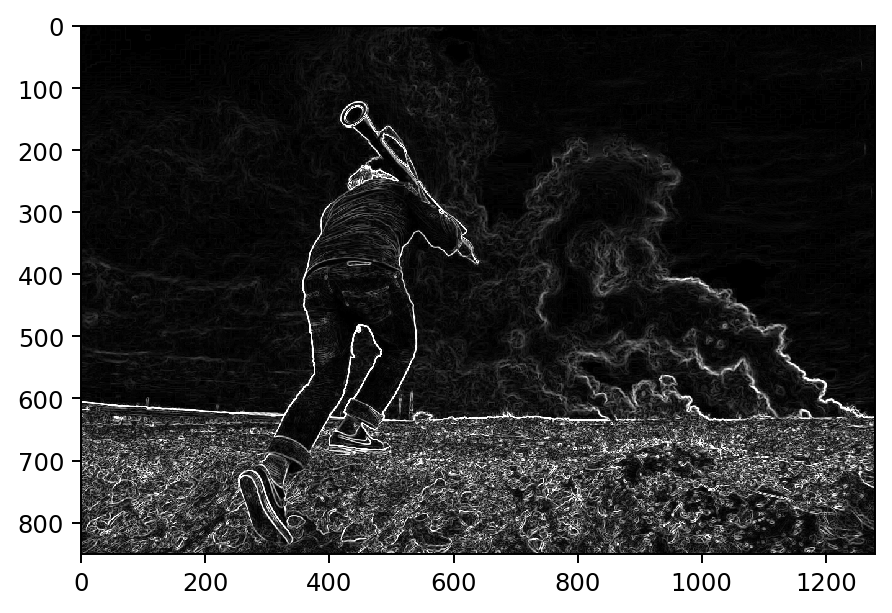

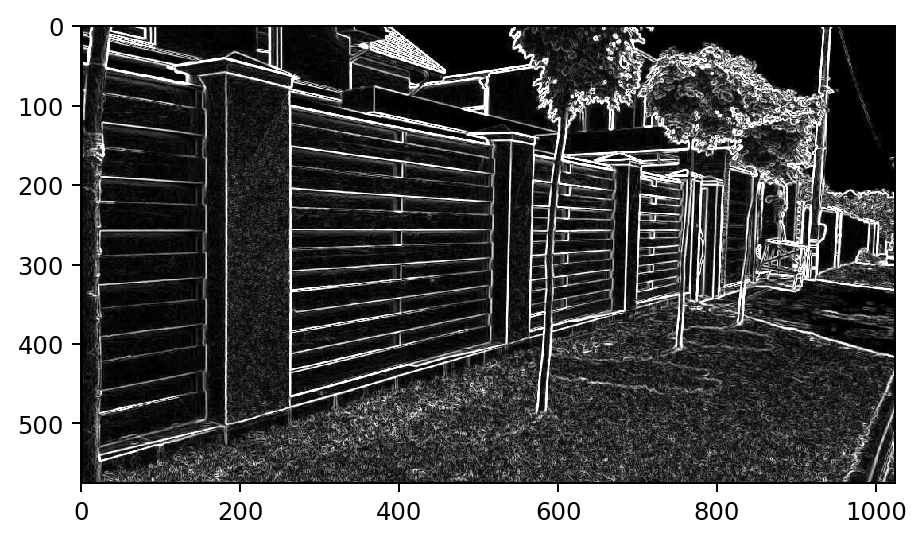

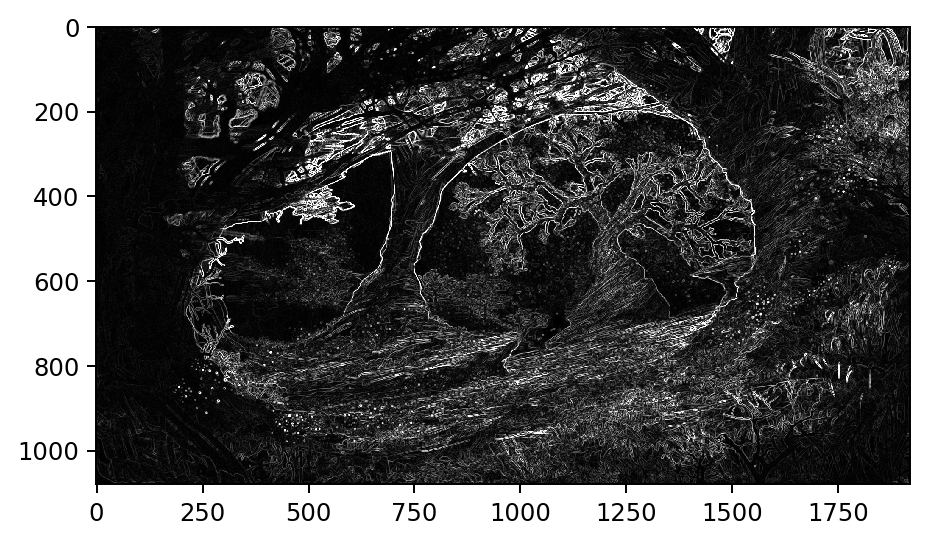

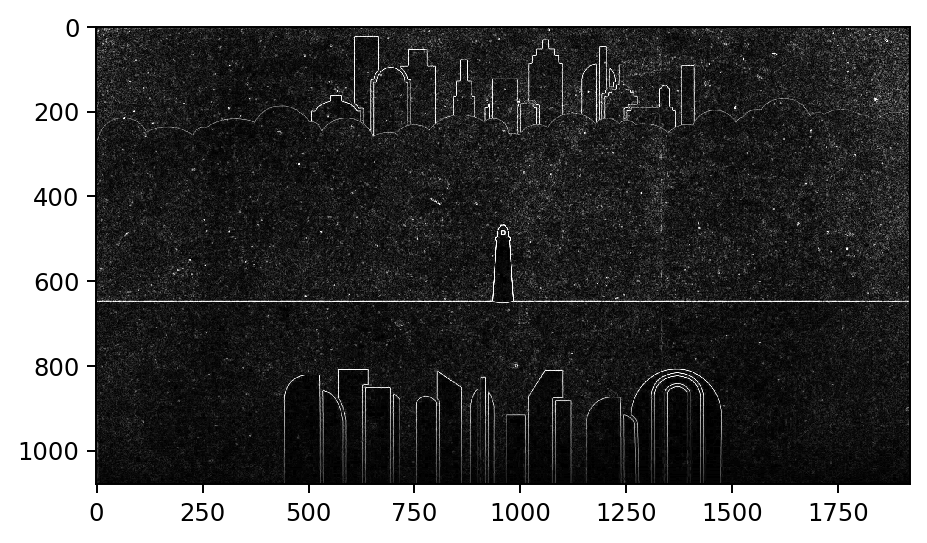

In [19]:
img1 = cv.cvtColor(cv.imread('res/1.jpg'), cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(cv.imread('res/2.jpg'), cv.COLOR_BGR2GRAY)
img3 = cv.cvtColor(cv.imread('res/3.jpg'), cv.COLOR_BGR2GRAY)
img4 = cv.cvtColor(cv.imread('res/4.jpg'), cv.COLOR_BGR2GRAY)
    
plt.figure(dpi=175)
plt.imshow(mapSobel(img1), cmap='gray')
plt.show()
plt.figure(dpi=175)
plt.imshow(mapSobel(img2), cmap='gray')
plt.show()
plt.figure(dpi=175)
plt.imshow(mapSobel(img3), cmap='gray')
plt.show()
plt.figure(dpi=175)
plt.imshow(mapSobel(img4), cmap='gray')
plt.show()

Следующий метод - применение оператора Превитта. От предыдущего отличается ядрами:
$$
G_x = 
\left(\begin{array}{ccc} 
1 & 0 & -1\\
1 & 0 & -1\\
1 & 0 & -1
\end{array}\right)
, \ \ G_y = 
\left(\begin{array}{ccc} 
-1 & -1 & -1\\
0 & 0 & 0\\
1 & 1 & 1
\end{array}\right)
$$

In [17]:
def mapPrevit(img) :
    img = np.array(img, dtype=np.int16)
    new_img = np.zeros(shape=img.shape)
    
    for i in range(2, img.shape[0] - 1) :
        for j in range(2, img.shape[1] - 1) :            
            new_val = ((img[i-1][j-1] + img[i][j-1] + img[i+1][j-1] - img[i-1][j+1] - img[i][j+1] - img[i+1][j+1])**2 +\
                       (img[i+1][j-1] + img[i+1][j] + img[i+1][j+1] - img[i-1][j-1] - img[i-1][j] - img[i-1][j+1])**2 ) ** (1/2)
            new_img[i][j] =  255 if new_val > 255 else new_val
        
    return new_img

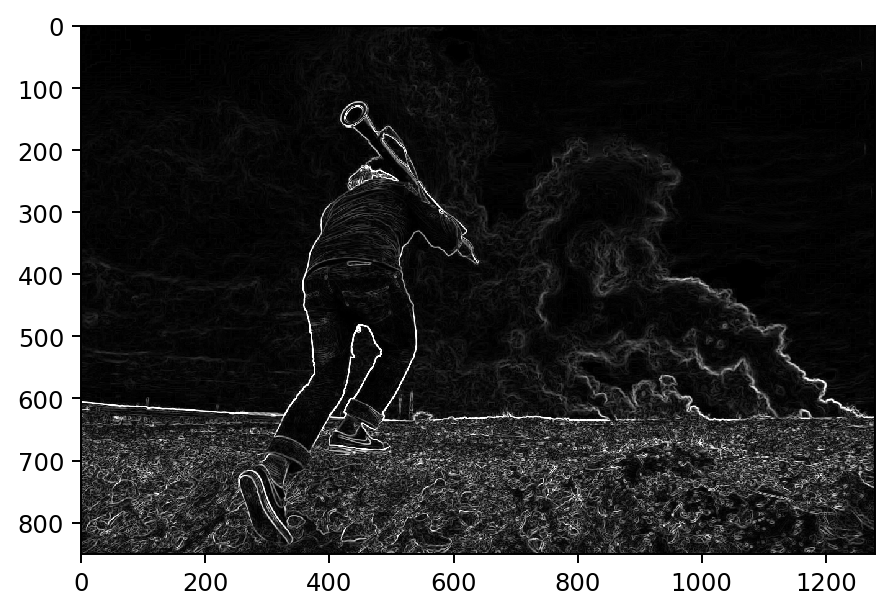

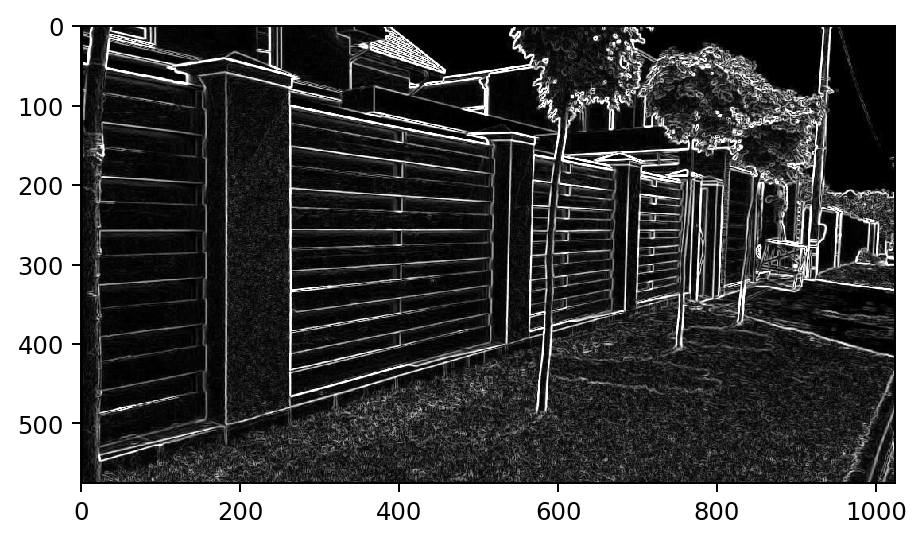

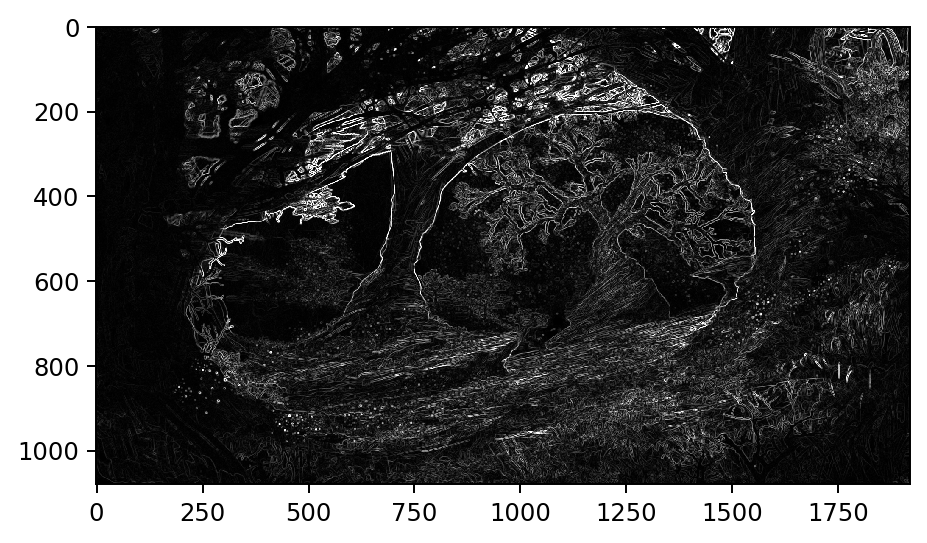

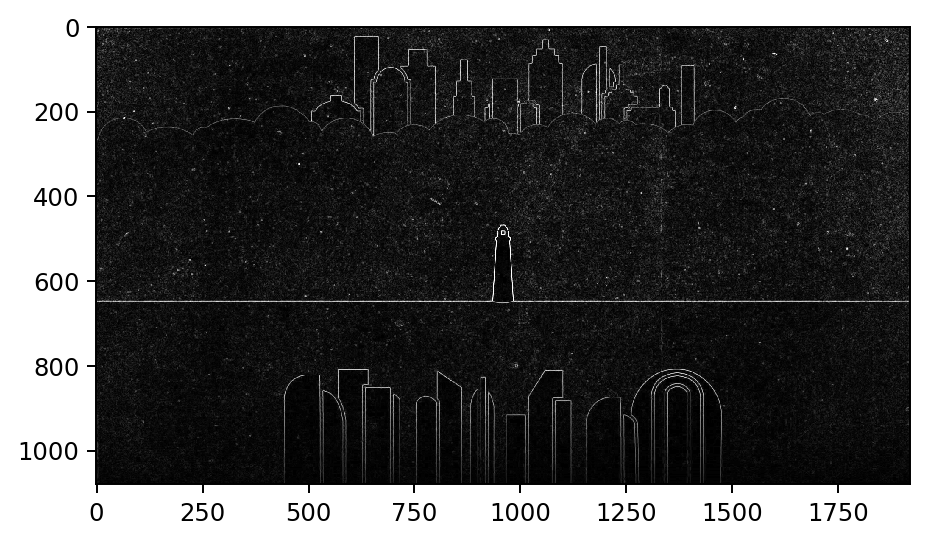

In [3]:
img1 = cv.cvtColor(cv.imread('res/1.jpg'), cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(cv.imread('res/2.jpg'), cv.COLOR_BGR2GRAY)
img3 = cv.cvtColor(cv.imread('res/3.jpg'), cv.COLOR_BGR2GRAY)
img4 = cv.cvtColor(cv.imread('res/4.jpg'), cv.COLOR_BGR2GRAY)
    
plt.figure(dpi=175)
plt.imshow(mapPrevit(img1), cmap='gray')
plt.show()
plt.figure(dpi=175)
plt.imshow(mapPrevit(img2), cmap='gray')
plt.show()
plt.figure(dpi=175)
plt.imshow(mapPrevit(img3), cmap='gray')
plt.show()
plt.figure(dpi=175)
plt.imshow(mapPrevit(img4), cmap='gray')
plt.show()

Так как визуально обнаружить различие двух методов не представляется возможным, было решено продемонстрировать разницу между двумя результатами путём вычисления изображения, являющегося разностью этих результатов.

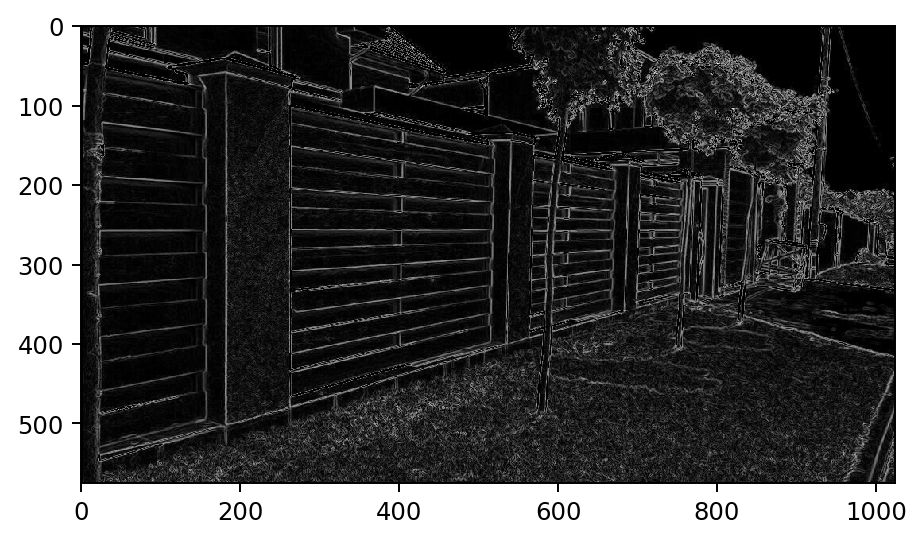

In [21]:
img1 = cv.cvtColor(cv.imread('res/2.jpg'), cv.COLOR_BGR2GRAY)

img_previt = mapPrevit(img1)
img_sobel = mapSobel(img1)

img_new = np.zeros(shape=img1.shape)
for i in range(1, img1.shape[0]) :
    for j in range(1, img1.shape[1]) :  
        img_new[i][j] = abs(img_previt[i][j] - img_sobel[i][j])

plt.figure(dpi=175)
plt.imshow(img_new, cmap='gray')
plt.show()

Видно, что разница незначительна, но всё же присутсвует.

Следующий метод - применение оператора Робертса. От предыдущего отличается ядрами, в данном случае изменился и их размер:
$$
G_x = 
\left(\begin{array}{cc} 
1 & 0\\
0 & -1
\end{array}\right)
, \ \ G_y = 
\left(\begin{array}{cc} 
0 & 1\\
-1 & 0
\end{array}\right)
$$

In [8]:
def mapRoberts(img) :
    img = np.array(img, dtype=np.int16)
    new_img = np.zeros(shape=img.shape)
    
    for i in range(1, img.shape[0] - 1) :
        for j in range(1, img.shape[1] - 1) :            
            new_val = ((img[i][j] - img[i+1][j+1])**2 +\
                       (img[i][j+1] - img[i+1][j])**2 ) ** (1/2)
            new_img[i][j] =  255 if new_val > 255 else new_val
        
    return new_img

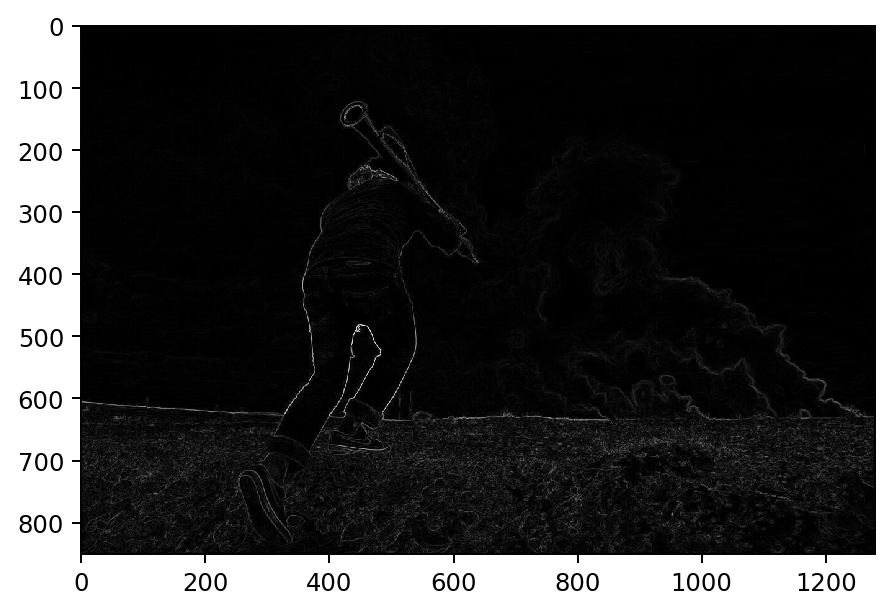

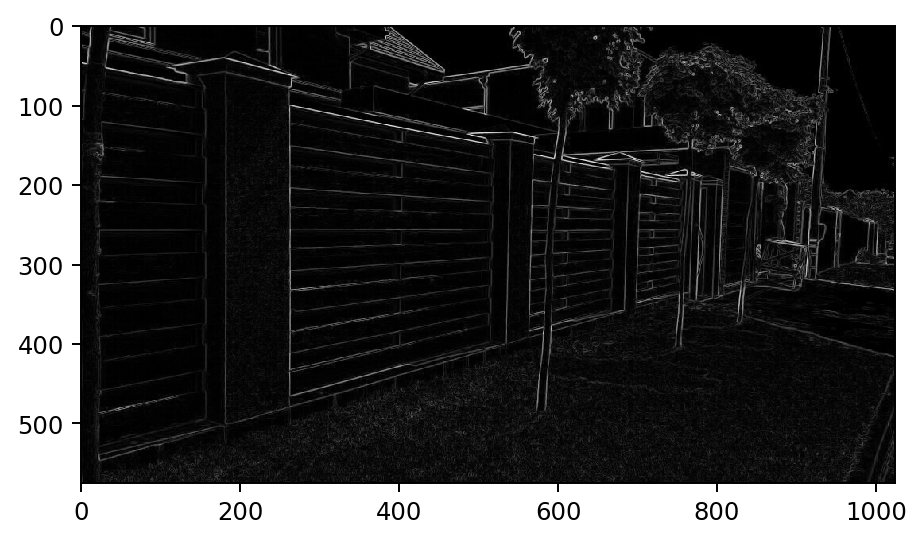

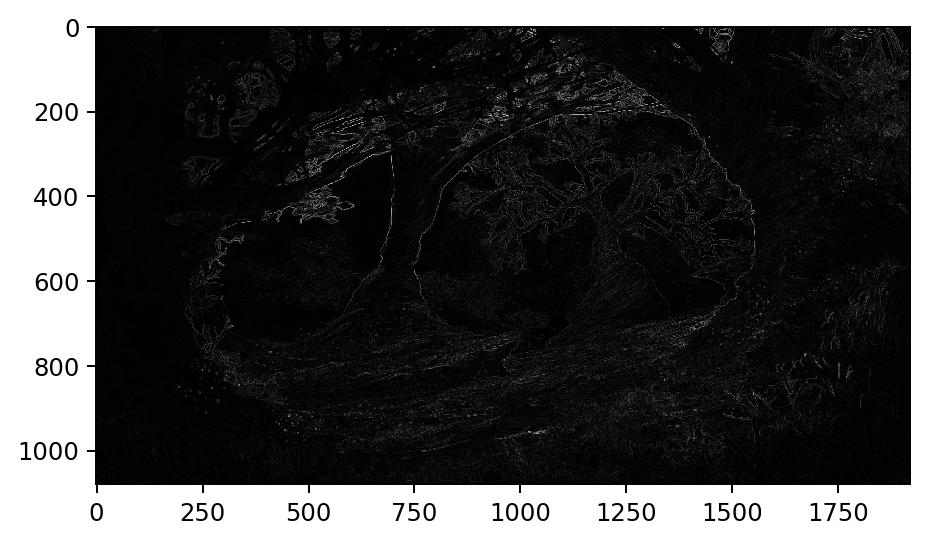

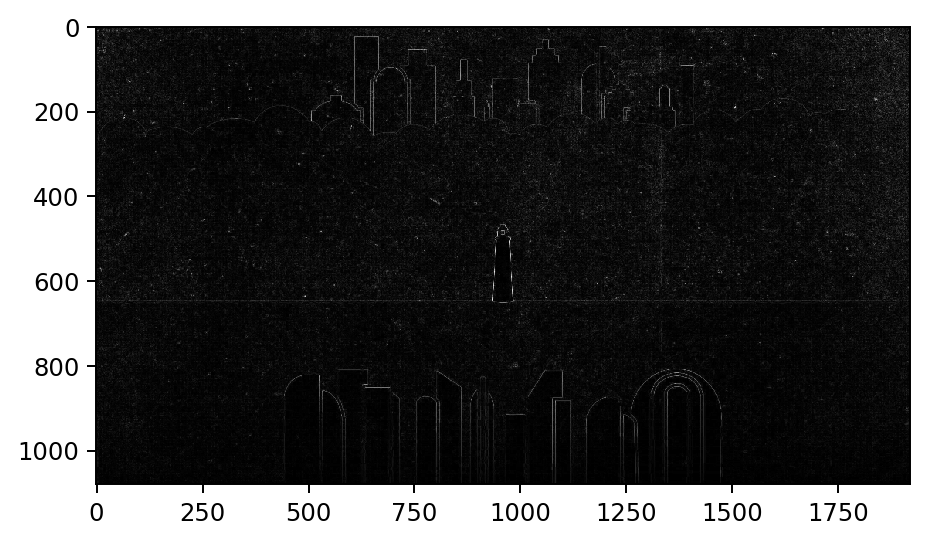

In [10]:
img1 = cv.cvtColor(cv.imread('res/1.jpg'), cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(cv.imread('res/2.jpg'), cv.COLOR_BGR2GRAY)
img3 = cv.cvtColor(cv.imread('res/3.jpg'), cv.COLOR_BGR2GRAY)
img4 = cv.cvtColor(cv.imread('res/4.jpg'), cv.COLOR_BGR2GRAY)
    
plt.figure(dpi=175)
plt.imshow(mapRoberts(img1), cmap='gray')
plt.show()
plt.figure(dpi=175)
plt.imshow(mapRoberts(img2), cmap='gray')
plt.show()
plt.figure(dpi=175)
plt.imshow(mapRoberts(img3), cmap='gray')
plt.show()
plt.figure(dpi=175)
plt.imshow(mapRoberts(img4), cmap='gray')
plt.show()